## Importing the necessary libraries

In [1]:
## For data manipulation
import pandas as pd

## For numerical computations
import numpy as np

## For Visualizations
import seaborn as sns 
import matplotlib.pyplot as plt

## Importing the dataset needed for the analysis

In [12]:
## Import the data here

In [56]:
# Storing each reviewer dataset in a list, for easy iteration.
## The ML dataset is also included.

names = [Adebola, AM2021, Anuj, Elbeth, BFA, Iamgold, Bobjiang, LKH, FizzyMidas,Tricelex, OxProof,
         Emmanel, Doggfather, EmmanuelJacobson, Flobisnitz, Greg, GreyTrainer, Stelescuvlad,
        Kish, Jshua, Kylin, Z4Yr0, TheHound, MountManu, Nadalie, Richard, Ogunsojosam, RobotTeddy,
         AnnAnna, Socal, Steegecs, ViktorLiu, Wolfman, ZER8, Kishoraditya, AnnAnna2, Waka, CassCee, ml_anon, ]

In [19]:
len(names)

39

## Formatting the ML dataset to work with the dataset.

In [15]:
## Dropping the irrelevant index attached by default to the dataset.
ml_anon.drop("Unnamed: 0", inplace=True, axis=1)

In [16]:
## Creating a column in the ML dataset that has the same format as the "Is Sybil? (T or F)" column in the reviewers dataset
ml_anon["Is Sybil? (T or F)"] = np.where(ml_anon.prediction_score == 1, "T", "F")

In [17]:
## Checking to make sure the created column is included in the dataset.
ml_anon.columns

Index(['handle', 'prediction_score', 'prediction_confidence', 'quant_1',
       'quant_2', 'quant_3', 'quant_4', 'quant_5', 'quant_6', 'quant_7',
       'Is Sybil? (T or F)'],
      dtype='object')

In [20]:
# Making a loop through all the datasheet of human evaluation,
# then renaming the Unnamed: 0 column to handle so that all the data used for the analysis have a column in common
for i in names:
    i.rename({"Unnamed: 0": "handle"}, axis=1, inplace=True)

In [21]:
def namestr(obj, namespace):
    """
    This function makes it posible to retrive the name of a variable (stored_data).
    """
    
    return [name for name in namespace if namespace[name] is obj]


In [22]:
def create_table(data1, data2):
    
    """
    This function creates a table for any two reviewer that share common handles reviewed.
    """
    
    df = pd.DataFrame()
    
    df = data1.merge(data2, on="handle", suffixes=(namestr(data1, globals())[0], namestr(data2, globals())[0]))
    
    df.dropna(subset=["Is Sybil? (T or F)" +namestr(data1, globals())[0], "Is Sybil? (T or F)" +namestr(data2, globals())[0]],
             inplace=True)
    
    return df

In [23]:
## This cell loops through 

def find_common_handles(name):
    
    """
    This function loops through the list of reviewers data and returns the each reviewer and number of handles they have in 
    common with the "name" given.
    """
    freq=[]
    for i in names:
        freq.append([namestr(i, globals())[0], create_table(name, i).shape[0]])
    return freq

In [24]:
def total_agreement(data, name1, name2):
    
    """
    This function calculates the total agreement of between any two reviewer.
    Ranges from 0 to 1.
    A score of 1 denotes they made the same call on all handles the reviewed in common.
    A score of 0 denotes they made the different call on all handles the reviewed in common.
    """
    
    lenght = data.shape[0]
    
    count = data.loc[data["Is Sybil? (T or F)" + name1] == data["Is Sybil? (T or F)" + name2]].shape[0]
    
    agreements = count
    
    return agreements/lenght
    

In [49]:
def agreement(name1, name2):
    
    """
    This function creates the table and calculate the Cohen_kappa score at once.
    """
    
    data = create_table(name1, name2)
    
    lenght = data.shape[0]
    
    if lenght == 0:
        result = np.NaN
    else:
        count = data.loc[data["Is Sybil? (T or F)" + namestr(name1, globals())[0]] == 
                         data["Is Sybil? (T or F)" + namestr(name2, globals())[0]]].shape[0]

        result = count/lenght
    
    return result

In [50]:
def t_agree(data):
    val = [agreement(data, i) for i in names if namestr(i, globals())[0] not in [namestr(data, globals())[0]] ]
    val.append(1)

    nam = [namestr(i, globals())[0] for i in names if namestr(i, globals())[0] not in [namestr(data, globals())[0]]]
    nam.append(namestr(data, globals())[0])
    
    df = pd.DataFrame()

    df["Reviewers"] = nam

    df[namestr(data, globals())[0]] = val
    
    return total_agreement_df.merge(df, "outer",on = "Reviewers" )

In [27]:
def total_disagreement(data, name1, name2):
    
    """
    This function calculates the total disagreement of between any two reviewer.
    Ranges from 0 to 1.
    A score of 0 denotes they made the same call on all handles the reviewed in common.
    A score of 1 denotes they made the different call on all handles the reviewed in common.
    """
    
    lenght = data.shape[0]
    
    count = data.loc[data["Is Sybil? (T or F)" + name1] != data["Is Sybil? (T or F)" + name2]].shape[0]
    
    disagreements = count
    
    return disagreements/lenght

## Total agreement Round 1

In [57]:
reviewers = []

for i in names:
    reviewers.append(namestr(i, globals())[0])

In [58]:
total_agreement_df = pd.DataFrame()
total_agreement_df["Reviewers"] = reviewers

In [59]:
for i in names:
    total_agreement_df = t_agree(i)

In [60]:
total_agreement_df

,Reviewers,Adebola,AM2021,Anuj,Elbeth,BFA,Iamgold,Bobjiang,LKH,FizzyMidas,...,Socal,Steegecs,ViktorLiu,Wolfman,ZER8,Kishoraditya,AnnAnna2,Waka,CassCee,ml_anon
0,Adebola,1.00,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,0.750000
1,AM2021,NaN,1.000000,1.000000,0.000000,NaN,NaN,0.000000,1.000000,1.000000,...,NaN,0.000000,1.000000,NaN,NaN,1.000000,0.666667,0.000000,NaN,0.613636
2,Anuj,NaN,1.000000,1.000000,1.000000,1.000000,NaN,0.000000,1.000000,1.000000,...,0.000000,0.333333,0.500000,NaN,NaN,NaN,1.000000,NaN,NaN,0.629630
3,Elbeth,NaN,0.000000,1.000000,1.000000,0.666667,1.000000,NaN,1.000000,0.000000,...,0.500000,NaN,1.000000,NaN,1.000000,NaN,1.000000,NaN,NaN,0.465116
4,BFA,NaN,NaN,1.000000,0.666667,1.000000,1.000000,1.000000,1.000000,0.500000,...,1.000000,NaN,0.000000,1.000000,NaN,0.666667,1.000000,NaN,NaN,0.512821
5,Iamgold,NaN,NaN,NaN,1.000000,1.000000,1.000000,NaN,0.333333,0.666667,...,NaN,1.000000,NaN,1.000000,0.666667,NaN,0.500000,NaN,NaN,0.714286
6,Bobjiang,1.00,0.000000,0.000000,NaN,1.000000,NaN,1.000000,1.000000,1.000000,...,NaN,1.000000,1.000000,0.000000,1.000000,0.000000,0.666667,1.000000,NaN,0.577778
7,LKH,NaN,1.000000,1.000000,1.000000,1.000000,0.333333,1.000000,1.000000,0.000000,...,1.000000,1.000000,1.000000,0.000000,NaN,1.000000,1.000000,NaN,NaN,0.619048
8,FizzyMidas,NaN,1.000000,1.000000,0.000000,0.500000,0.666667,1.000000,0.000000,1.000000,...,0.333333,1.000000,1.000000,0.000000,1.000000,NaN,1.000000,NaN,NaN,0.666667
9,Tricelex,NaN,NaN,NaN,0.600000,1.000000,1.000000,NaN,0.500000,0.000000,...,0.666667,NaN,0.500000,NaN,0.000000,1.000000,0.000000,NaN,NaN,0.282051


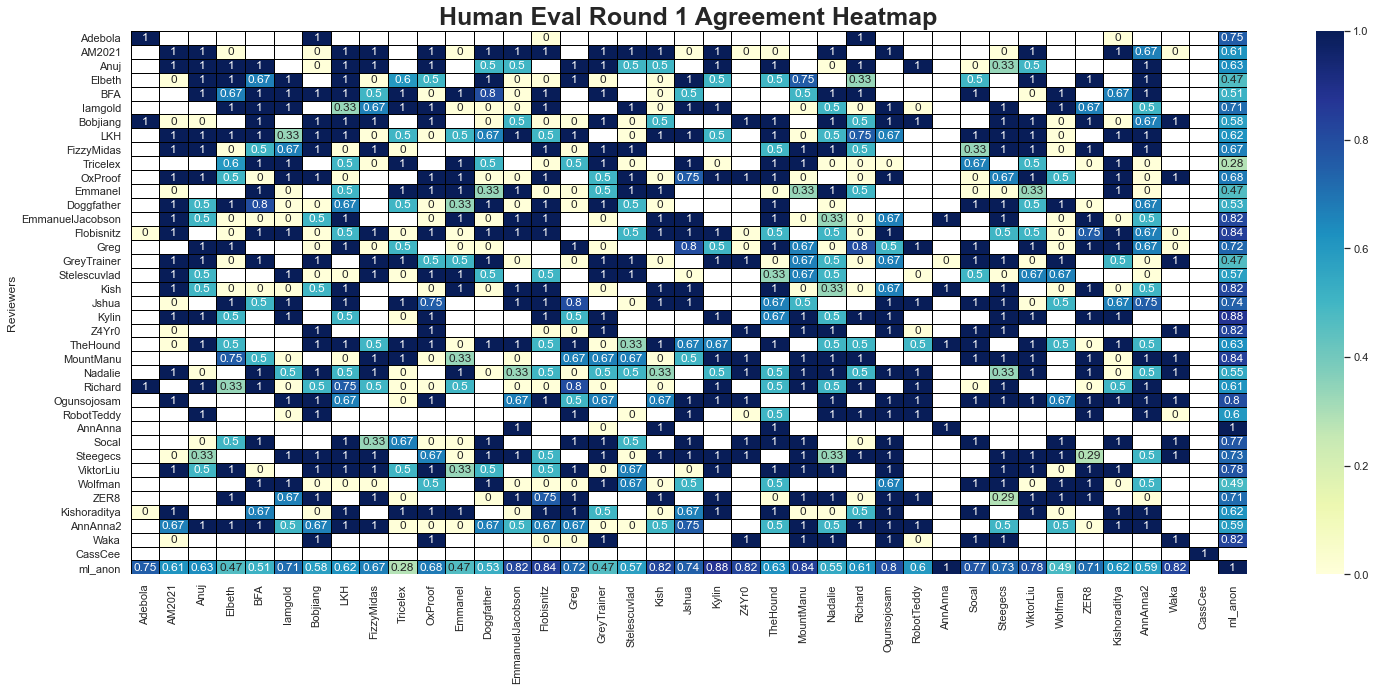

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt
# You can change the values here to your taste.
plt.figure(figsize=(25,10))
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
#corr.rename({"Unnamed: 0": " "}, axis=1, inplace=True)
sns.heatmap(total_agreement_df.set_index("Reviewers"), annot=True, cmap="YlGnBu", linecolor="black", linewidths=0.5)
plt.title("Human eval round 1 agreement heatmap".title(), fontsize=25, weight="bold")
plt.savefig("Human eval round 1 agreement heatmap.png")
plt.show()


## Number of handles reviewed in common by every pair of reviewer

In [67]:
def handles_reviewed(data1, data2):
    
    """
    This function returns the number of handles reviewed by a pair of reviewers (name1 and name2)
    """
    
    table = create_table(data1, data2)
    
    return table.shape[0]

def common_handles(data):
    
    """
    
    This function automates the process...
    """
    val = [handles_reviewed(data, i) for i in names ]
    

    nam = [namestr(i, globals())[0] for i in names ]
    
    
    df = pd.DataFrame()

    df["Reviewers"] = nam

    df[namestr(data, globals())[0]] = val
    
    return common_handles_df.merge(df, "outer",on = "Reviewers" )

In [68]:
reviewers = []

## This for loop, is used to generate the names of reviewers for this round
for i in names:
    reviewers.append(namestr(i, globals())[0])
    
## Creating a dataset for the common handles by all reviewers
common_handles_df = pd.DataFrame()
common_handles_df["Reviewers"] = reviewers

for i in names:
    ## This loops through the automated code, and stores the numbers as required.
    common_handles_df = common_handles(i)

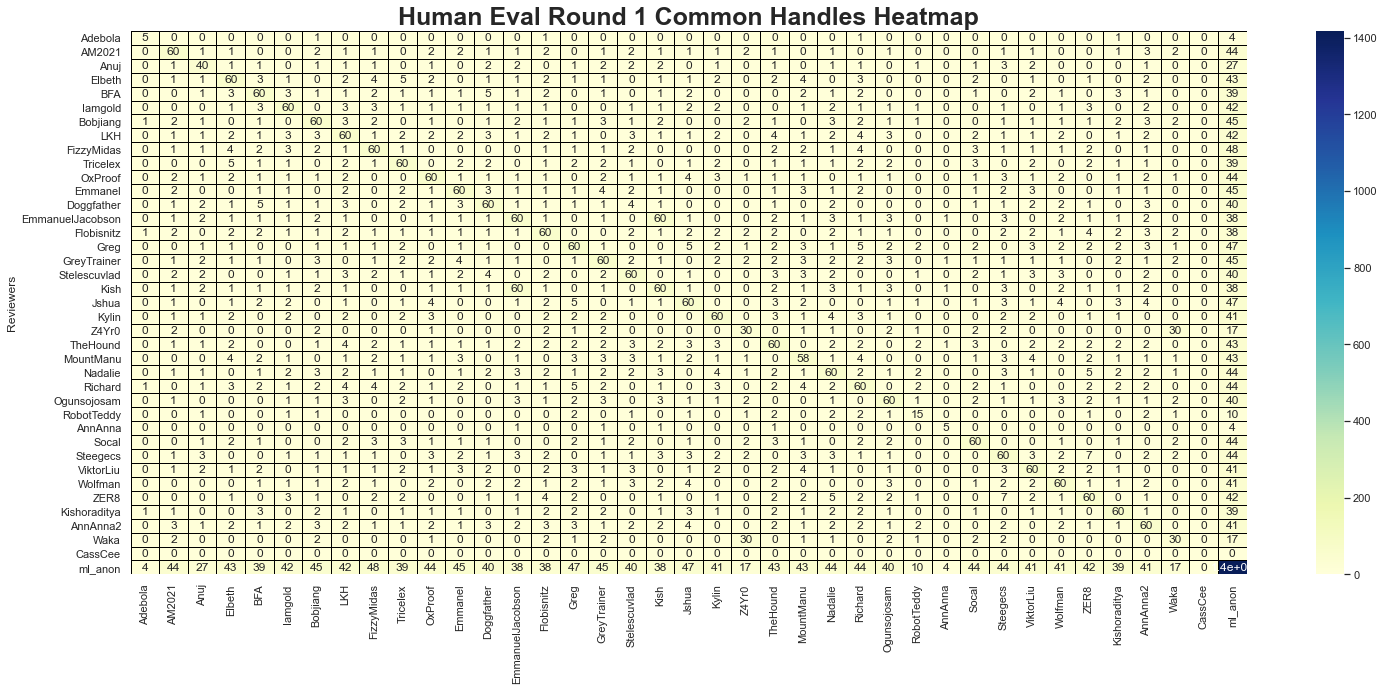

In [69]:
# You can change the values here to your taste.
plt.figure(figsize=(25,10))
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
sns.heatmap(common_handles_df.set_index("Reviewers"), annot=True, cmap="YlGnBu", linecolor="black", linewidths=0.5)
plt.title("Human eval round 1 common handles heatmap".title(), fontsize=25, weight="bold")
plt.savefig("Human eval round 1 common handles heatmap.png")
plt.show()